In [1]:
repo_url = ' https://github.com/saisharank/FullPartial'
import os

%cd /content

repo_dir_path = os.path.abspath(os.path.join('.', os.path.basename(repo_url)))

!git clone {repo_url}
%cd {repo_dir_path}
!git pull

/content
Cloning into 'FullPartial'...
remote: Enumerating objects: 1361, done.
remote: Counting objects: 100% (1361/1361), done.
remote: Compressing objects: 100% (1361/1361), done.
remote: Total 1361 (delta 0), reused 1361 (delta 0), pack-reused 0
Receiving objects: 100% (1361/1361), 28.36 MiB | 31.64 MiB/s, done.
/content/FullPartial
Already up to date.


In [2]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2

Using TensorFlow backend.


In [0]:
# dimensions of our images.
img_width, img_height = 224, 224

In [0]:
train_data_dir = '/content/FullPartial/training'
validation_data_dir = '/content/FullPartial/testing'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 64

In [5]:
from keras import regularizers
base_model=MobileNet(weights='imagenet',include_top=False) #imports the inceptionv3 model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x= Dropout(0.5)(x)
x=Dense(512,activation='relu', kernel_regularizer=regularizers.l2(0.001))(x) #dense layer 3
x= Dropout(0.5)(x)
preds=Dense(2,activation='softmax', kernel_regularizer=regularizers.l2(0.001))(x) #final layer with softmax activation


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '







17227776/17225924 [==============================] - 1s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [7]:

for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [0]:
#for layer in model.layers:
    #layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
  layer.trainable=False
for layer in model.layers[20:]:
  layer.trainable=True

In [0]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
     rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
    brightness_range=[0.2,1.0],
        fill_mode='nearest')
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), 
                                                    batch_size=batch_size, class_mode='categorical')

In [11]:
validation_generator = test_datagen.flow_from_directory(validation_data_dir, target_size=(img_width, img_height),
                                                        batch_size=batch_size, class_mode='categorical')

Found 264 images belonging to 2 classes.


In [0]:
import os
from keras.callbacks import ModelCheckpoint
savepath = os.path.join( ""+ 'e1-{epoch:03d}-vl-{val_loss:.3f}-va-{val_acc:.3f}.h5' )
checkpointer = ModelCheckpoint(filepath=savepath)

In [18]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(
        train_generator,
        steps_per_epoch=1000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size,
        callbacks=[checkpointer])
model.save_weights('first_try.h5') 

Epoch 1/50
15/15 [==============================] - 17s 1s/step - loss: 8.2579 - acc: 0.4813 - val_loss: 8.4035 - val_acc: 0.4817
Epoch 2/50
15/15 [==============================] - 11s 730ms/step - loss: 8.7702 - acc: 0.4583 - val_loss: 8.2424 - val_acc: 0.4787
Epoch 3/50
15/15 [==============================] - 12s 797ms/step - loss: 1.1965 - acc: 0.5522 - val_loss: 0.7150 - val_acc: 0.5217
Epoch 4/50
15/15 [==============================] - 13s 840ms/step - loss: 0.7165 - acc: 0.5208 - val_loss: 0.7089 - val_acc: 0.5137
Epoch 5/50
15/15 [==============================] - 12s 791ms/step - loss: 0.7140 - acc: 0.4321 - val_loss: 4.1042 - val_acc: 0.4800
Epoch 6/50
15/15 [==============================] - 12s 783ms/step - loss: 0.8365 - acc: 0.5480 - val_loss: 0.7148 - val_acc: 0.5137
Epoch 7/50
15/15 [==============================] - 13s 867ms/step - loss: 0.7118 - acc: 0.5021 - val_loss: 0.7098 - val_acc: 0.5259
Epoch 8/50
15/15 [==============================] - 11s 741ms/step - los

Text(0.5, 1.0, 'Training and validation loss')

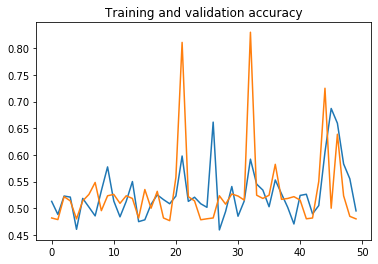

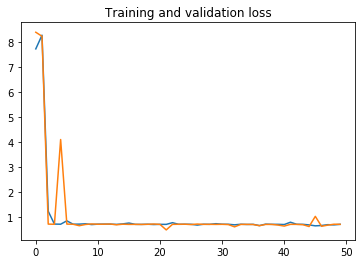

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [20]:
import os
import os.path as osp
import argparse

import tensorflow as tf

from keras.models import load_model
from keras import backend as K




def convertGraph( modelPath, outdir, numoutputs, prefix, name):
    '''
    Converts an HD5F file to a .pb file for use with Tensorflow.
    Args:
        modelPath (str): path to the .h5 file
           outdir (str): path to the output directory
       numoutputs (int):   
           prefix (str): the prefix of the output aliasing
             name (str):
    Returns:
        None
    '''
    
    #NOTE: If using Python > 3.2, this could be replaced with os.makedirs( name, exist_ok=True )
    if not os.path.isdir(outdir):
        os.mkdir(outdir)

    K.set_learning_phase(0)

    net_model = load_model(modelPath)

    # Alias the outputs in the model - this sometimes makes them easier to access in TF
    pred = [None]*numoutputs
    pred_node_names = [None]*numoutputs
    for i in range(numoutputs):
        pred_node_names[i] = prefix+'_'+str(i)
        pred[i] = tf.identity(net_model.output[i], name=pred_node_names[i])
    print('Output nodes names are: ', pred_node_names)

    sess = K.get_session()
    
    # Write the graph in human readable
    f = 'graph_def_for_reference.pb.ascii'
    tf.train.write_graph(sess.graph.as_graph_def(), outdir, f, as_text=True)
    print('Saved the graph definition in ascii format at: ', osp.join(outdir, f))

    # Write the graph in binary .pb file
    from tensorflow.python.framework import graph_util
    from tensorflow.python.framework import graph_io
    constant_graph = graph_util.convert_variables_to_constants(sess, sess.graph.as_graph_def(), pred_node_names)
    graph_io.write_graph(constant_graph, outdir, name, as_text=False)
    print('Saved the constant graph (ready for inference) at: ', osp.join(outdir, name))

convertGraph( "/content/FullPartial/e1-035-vl-0.251-va-0.970.h5", "/content/", 1,'output', 'output_graph.pb' )


Output nodes names are:  ['output_0']
Saved the graph definition in ascii format at:  /content/graph_def_for_reference.pb.ascii
INFO:tensorflow:Froze 141 variables.


INFO:tensorflow:Froze 141 variables.


INFO:tensorflow:Converted 141 variables to const ops.


INFO:tensorflow:Converted 141 variables to const ops.


Saved the constant graph (ready for inference) at:  /content/output_graph.pb


In [21]:
import tensorflow as tf
from tensorflow.python.platform import gfile

f = gfile.FastGFile("/content/output_graph.pb", 'rb')
graph_def = tf.GraphDef()
# Parses a serialized binary message into the current message.
graph_def.ParseFromString(f.read())
f.close()

#sess.graph.as_default()
# Import a serialized TensorFlow `GraphDef` protocol buffer
# and place into the current default `Graph`.
tf.import_graph_def(graph_def)
print('Check out the input placeholders:')
nodes = [n.name + ' => ' +  n.op for n in graph_def.node if n.op in ('Placeholder')]
for node in nodes:
    print(node)

Check out the input placeholders:
input_1_1 => Placeholder
